# Разведочный анализ (EDA) продаж супермакетов

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
import os
for dirname, _, filenames in os.walk('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-volodina/supermarket.csv.zip'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [4]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-volodina/supermarket.csv.zip')

In [5]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


## Датафрейм содержит следующие данные:

- Row ID - индекс заказа
- Order ID - идентификатор заказа
- Order Date - дата заказа
- Ship Date - дата отправления заказа
- Ship Mode - состояние отправления
- Customer ID - идентификатор покупателя
- Customer Name - имя покупателя
- Segment - тип заказа
- Country - страна, в которой сделан заказ
- City - город, в котором сделан заказ
- State - штат, в котором сделан заказ
- Postal Code - почтовый индекс покупателя
- Region - регион страны
- Product ID - идентификатор корзины покупок
- Category - категория товаров
- Sub-Category - подкатегория товаров
- Product Name - название товара
- Sales - стоимость товара

## Разведочный анализ (EDA) будет включать:
- изучение структуры и характеристики данных: обзор размера набора данных, типов переменных, наличия пропущенных значений, дубликатов;
- выявление аномалий и выбросов;
- подготовка данных для дальнейших этапов анализа.

### В качестве инструментов будем использовать:
- визуализацию при помощи библиотек matplotlib и seaborn;
- сводные статистики и меры центральной тенденции;
- анализ выбросов и аномалий

In [6]:
df.info() # знакомимся с данными

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
# т.к. Order Date и Ship Date имеют тип данных 'object', приведем их к временому типу
df['Order Date'] = pd.to_datetime(df['Order Date']).dt.date
df['Ship Date'] = pd.to_datetime(df['Ship Date']).dt.date

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [9]:
df.shape

(9800, 18)

In [10]:
# проверяем есть ли в датафреме пропущенные значения
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [11]:
# заполняем пропущенные значения нулями
new_df = df.fillna(0)

In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [13]:
# отберем в датафрейме только повторяющиеся наблюдения (дубликаты)
df_dupl = df.loc[df.duplicated()]

In [14]:
df_dupl

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


#### Повторяющихся наблюдений в датасете не найдено, теперь данные готовы к дальнейшему исследованию

In [15]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


### Визуализируем данные

#### Посмотрим на разброс стоимости на товары и изобразим их с помощью бокс-плота. Он покажет нам средние значения стоимости товаров, а также аномалии и выбросы

In [24]:
df.Sales.describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

In [26]:
df_box = df.Sales.describe()

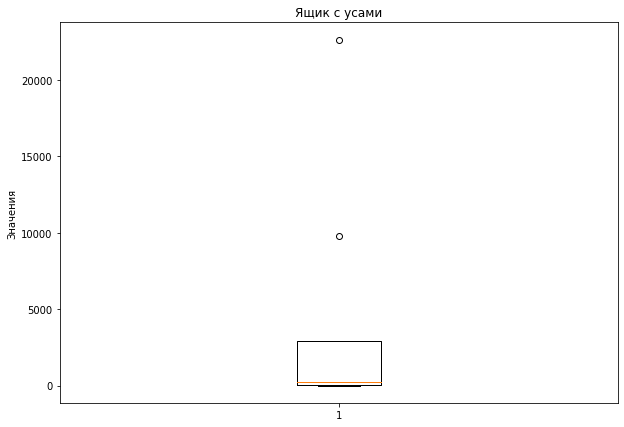

In [29]:
plt.figure(figsize=(10, 7))
plt.boxplot(df_box)
plt.ylabel('Значения')
plt.title('Ящик с усами')
plt.show()

#### Исходя из "ящика с усами" видно преобладание стоимости товаров выше медианной стоимости и показаны выбросы.
Проверим, адекватна ли стоимость этих товаров или это случайное значение

In [32]:
new_df = df[['Sub-Category', 'Sales']].sort_values(by='Sales', ascending=False)

In [33]:
new_df

,Sub-Category,Sales
2697,Machines,22638.480
6826,Copiers,17499.950
8153,Copiers,13999.960
2623,Copiers,11199.968
4190,Copiers,10499.970
...,...,...
2106,Binders,0.876
4711,Binders,0.852
8658,Binders,0.836
9292,Binders,0.556


#### Как видно, товары с высокой стоимостью действительно есть и она оправдана, но количество их заметно меньше, чем основного количеств товаров

#### Теперь посмотрим на распределение стоимости товаров и самих товаров

In [58]:
df.groupby('Sub-Category', as_index=False)\
    .agg({'Sales': 'sum'})\
    .sort_values(by='Sales', ascending=False)

,Sub-Category,Sales
13,Phones,327782.4480
5,Chairs,322822.7310
14,Storage,219343.3920
16,Tables,202810.6280
3,Binders,200028.7850
11,Machines,189238.6310
0,Accessories,164186.7000
6,Copiers,146248.0940
4,Bookcases,113813.1987
1,Appliances,104618.4030


In [59]:
df_sales = df.groupby('Sub-Category')\
    .agg({'Sales': 'sum'})\
    .sort_values(by='Sales', ascending=False)

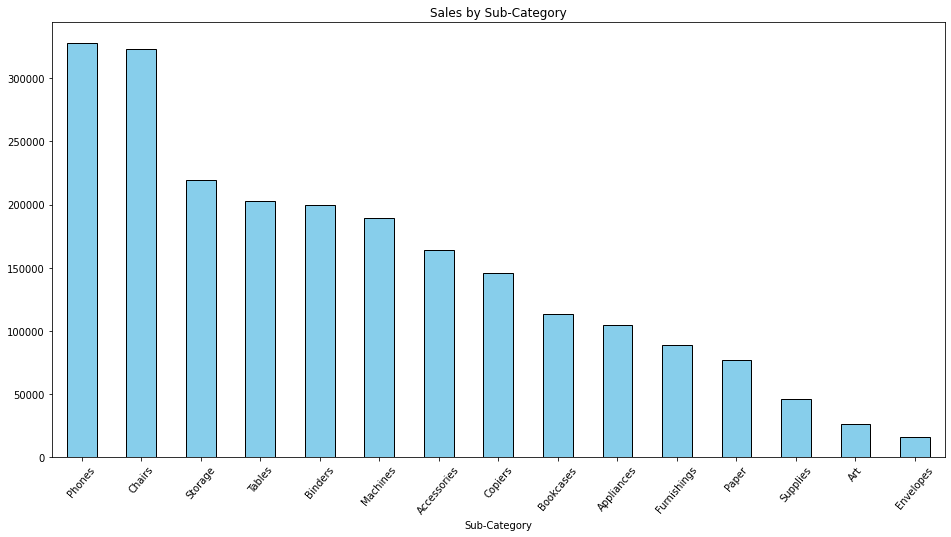

In [60]:
plt.figure(figsize=(16,8))
df_sales['Sales'].nlargest(15).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Sales by Sub-Category')
plt.xticks(rotation=50)
plt.show()

#### Посчитаем категории покупок и изобразим их процентное соотношение

In [15]:
category_counts = df['Category'].value_counts()

In [16]:
category_counts

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

In [17]:
categories = category_counts.index.tolist() 

In [18]:
categories

['Office Supplies', 'Furniture', 'Technology']

In [19]:
counts = category_counts.values.tolist()

In [20]:
counts

[5909, 2078, 1813]

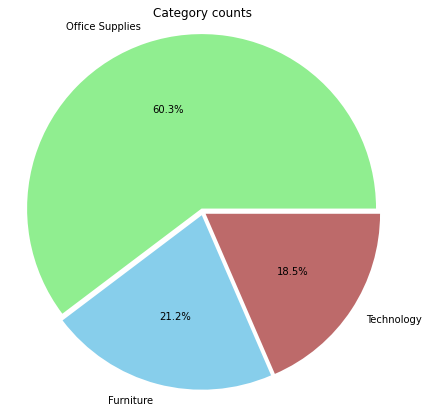

In [21]:
plt.figure(figsize=(7, 7))
plt.pie(counts, labels=categories, autopct='%1.1f%%', explode = [0.02, 0.02, 0.02], colors = ["lightgreen", "skyblue", "#bd6a6a"])
plt.ylabel('')
plt.axis('equal')  
plt.title('Сategory counts')

plt.show()

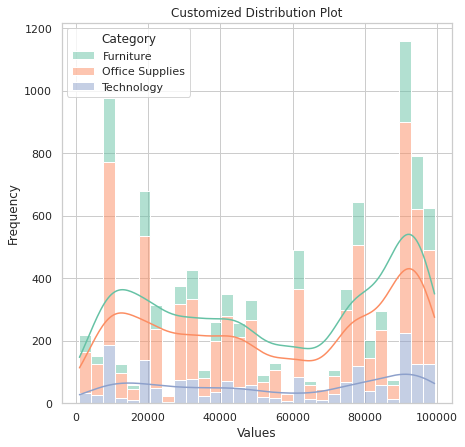

In [22]:
plt.figure(figsize=(7, 7))
sns.set(style="whitegrid")

sns.histplot(data=df, x='Postal Code', kde=True, hue='Category', palette='Set2', multiple='stack', bins=30)
plt.title('Customized Distribution Plot')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.show()

#### Подсчитаем подкатегории покупок и отсортируем их на графике

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

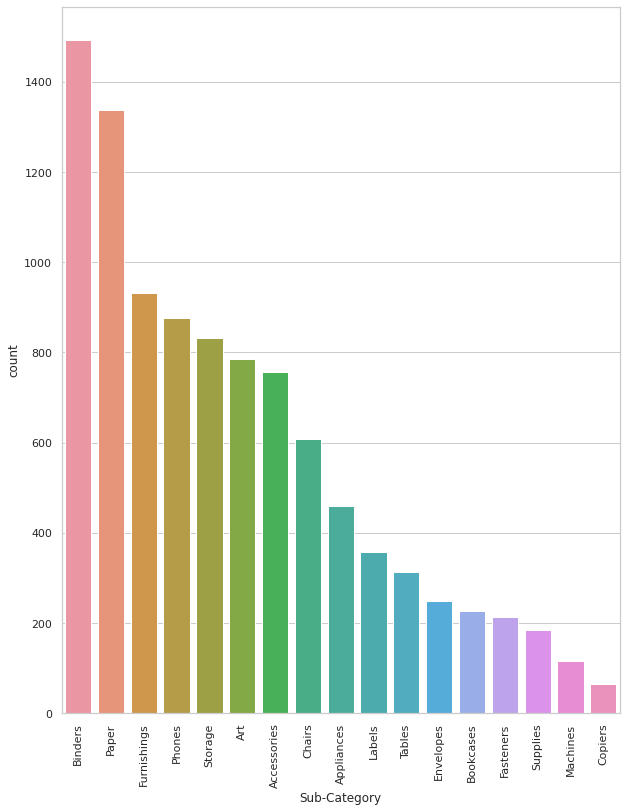

In [23]:
plt.figure(figsize=(10,13))
sns.countplot(x='Sub-Category',data=df, order = df['Sub-Category'].value_counts().index)

plt.xticks(rotation=90)

#### Теперь сгруппируем датафрейм на основе заказов и дат, в которые они были сделаны. Найдем дни с большим количеством покупок

In [25]:
orders_by_day = df.groupby('Order Date')\
    .agg({'Order ID': 'count'})\
    .rename(columns={'Order ID': 'orders'}) \
    .rename(columns={'Order Date': 'date'}) \
    .sort_values(by='orders', ascending=False)

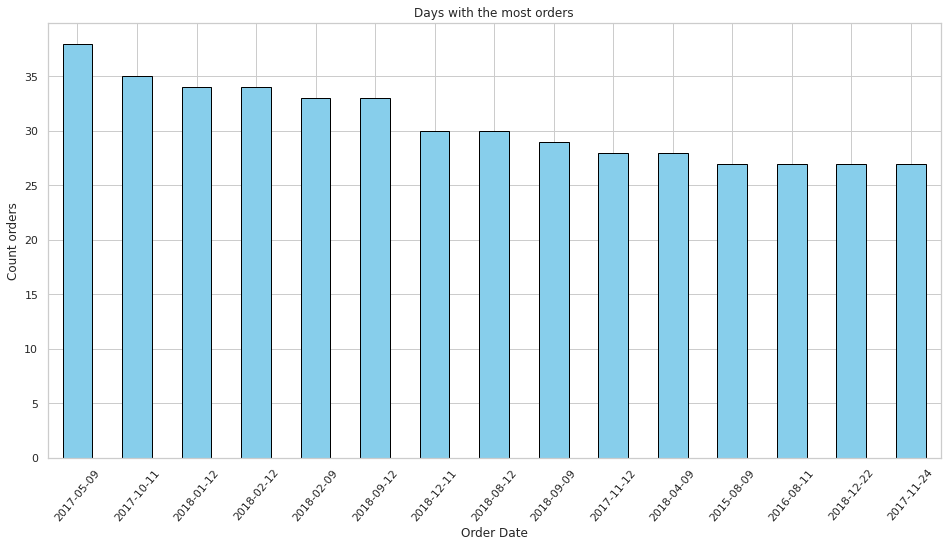

In [26]:
plt.figure(figsize=(16,8))
orders_by_day['orders'].nlargest(15).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Days with the most orders')
plt.ylabel('Count orders')
plt.xticks(rotation=50)
plt.show()

#### Рассмотрим сегменты покупателей и изобразим их соотношение от заказов на графике

In [28]:
df['Segment'].value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

In [29]:
df1 = df.groupby(['Segment', 'Category'], as_index=False)\
    .agg({'Order ID': 'count'})\
    .sort_values(by='Order ID', ascending=False)

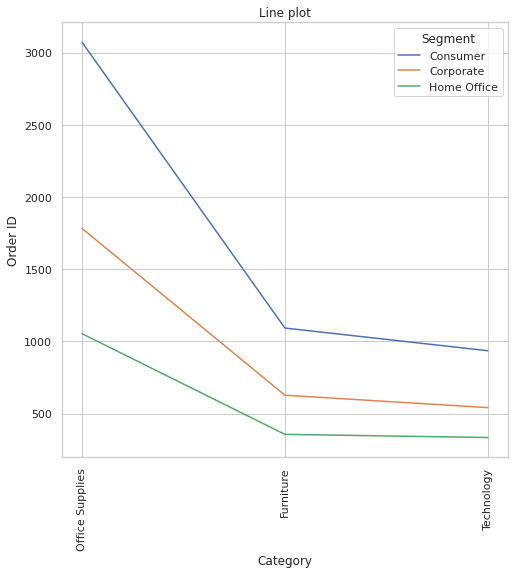

In [30]:
plt.figure(figsize=(8, 8))
sns.lineplot(x="Category",y="Order ID",data=df1,hue="Segment")
plt.title('Line plot')
plt.xticks(rotation=90) 
plt.show()

#### Посмотрим, в каком режиме чаще всего заказывали доставку

In [36]:
df['Ship Mode'].value_counts()

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

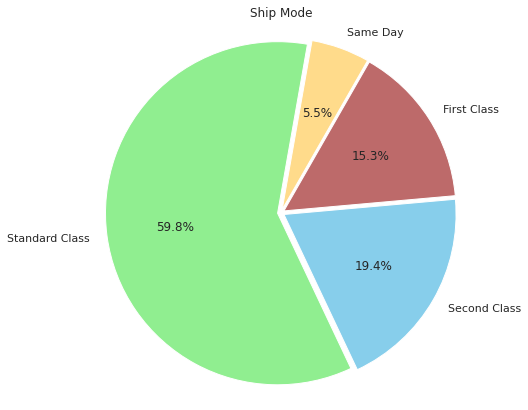

In [45]:
plt.figure(figsize=(7, 7))
df['Ship Mode'].value_counts().plot.pie(
    autopct='%1.1f%%',  
    explode=[0.02] * len(df['Ship Mode'].value_counts()), 
    colors=["lightgreen", "skyblue", "#bd6a6a", '#FFDB8B'][:len(df['Ship Mode'].value_counts())],
    startangle=80 
)

plt.ylabel('')  
plt.axis('equal')  
plt.title('Ship Mode')

plt.show()

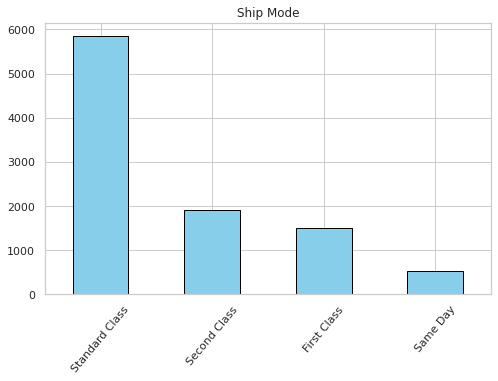

In [50]:
plt.figure(figsize=(8,5))
df['Ship Mode'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Ship Mode')
plt.xticks(rotation=50)
plt.show()

#### Определим города, в которых совершались заказы

In [51]:
df['Country'].value_counts()

United States    9800
Name: Country, dtype: int64

In [63]:
df_city = df.groupby('City')\
    .agg({'Order ID': 'count'})\
    .sort_values(by='Order ID', ascending=False)\
    .rename(columns={'Order ID': 'count_orders'}) \

In [64]:
df_city

,count_orders
City,
New York City,891
Los Angeles,728
Philadelphia,532
San Francisco,500
Seattle,426
...,...
Keller,1
Jupiter,1
Jefferson City,1


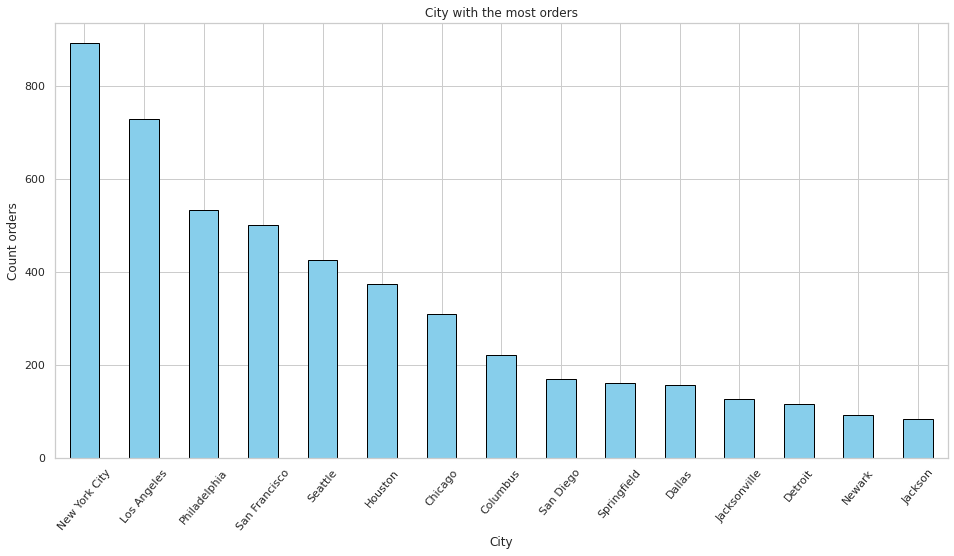

In [65]:
plt.figure(figsize=(16,8))
df_city['count_orders'].nlargest(15).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('City with the most orders')
plt.ylabel('Count orders')
plt.xticks(rotation=50)
plt.show()